In [1]:
import json
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from helpers import plotOwners, plotNewOwners, remove0s

In [2]:
client = MongoClient('localhost', 27017)
db = client.steamspy

In [3]:
#creating new columns to be used for data and casting things as ints
data = pd.DataFrame(list(db.clean.find()))
data.drop(columns = "_id", inplace = True) #drop _id column
#making price column ints and making price of free games 0
data['price'] = data['price'].fillna(0)
data['price'] = data['price'].astype(int)
data['negative'] = data['negative'].astype(int)
data['positive'] = data['positive'].astype(int)
data['Like/Dislike Ratio'] = data['positive']/data['negative']
data = data[data['Genres'].apply(lambda x: 'Indie' not in x)]
data = data[data.price != 0]
data['Owner Average'] = (data['llOwners'] + data['ulOwners'])/2
data['earnings'] = data['price'] * data['Owner Average']

In [5]:
action = data[data['Genres'].apply(lambda x: 'Action' in x)]
strategy = data[data['Genres'].apply(lambda x: 'Strategy' in x)]
rpg = data[data['Genres'].apply(lambda x: 'RPG' in x)]
adventure = data[data['Genres'].apply(lambda x: 'Adventure' in x)]
sports = data[data['Genres'].apply(lambda x: 'Sports' in x)]
simulation = data[data['Genres'].apply(lambda x: 'Simulation' in x)]
mmo = data[data['Genres'].apply(lambda x: 'MMO' in x)]
theGenres = [action, strategy, rpg, adventure, sports, simulation, mmo]
genreNames = ['Action', 'Strategy', 'RPG', 'Adventure', 'Sports',
              'Simulation', 'MMO']

In [21]:
def createEarningsDF(listOfDfs, names):
    count = []
    earnings = []
    for i in listOfDfs:
        count.append(i.shape[0])
        earnings.append(i['earnings'].sum()/100)
    df = pd.DataFrame({'Type':names,'Earnings':earnings, 'Count':count})
    df['earningsAvg'] = df['Earnings']/df['Count']
    return df

In [31]:
def plotEarnings(listOfDfs, names, rotation=0, title1 = "Total Earnings", title2 = "Average Earnings per Game"):
    df = createEarningsDF(listOfDfs, names)
    
    ax = df.plot.bar(x = 'Type',y = 'Earnings',rot=rotation, 
                     figsize = (20,10), title=title1) 
    ax.tick_params(axis = 'both', labelsize=15)
    ax.set_ylabel("USD", fontsize = 40)
    ax.title.set_size(40)
    
    ax = df.plot.bar(x = 'Type',y = 'earningsAvg', rot=rotation, figsize=(20,10), 
                     title = title2)
    ax.tick_params(axis = 'both', labelsize=15)
    ax.set_ylabel("USD", fontsize = 40)
    ax.title.set_size(40)

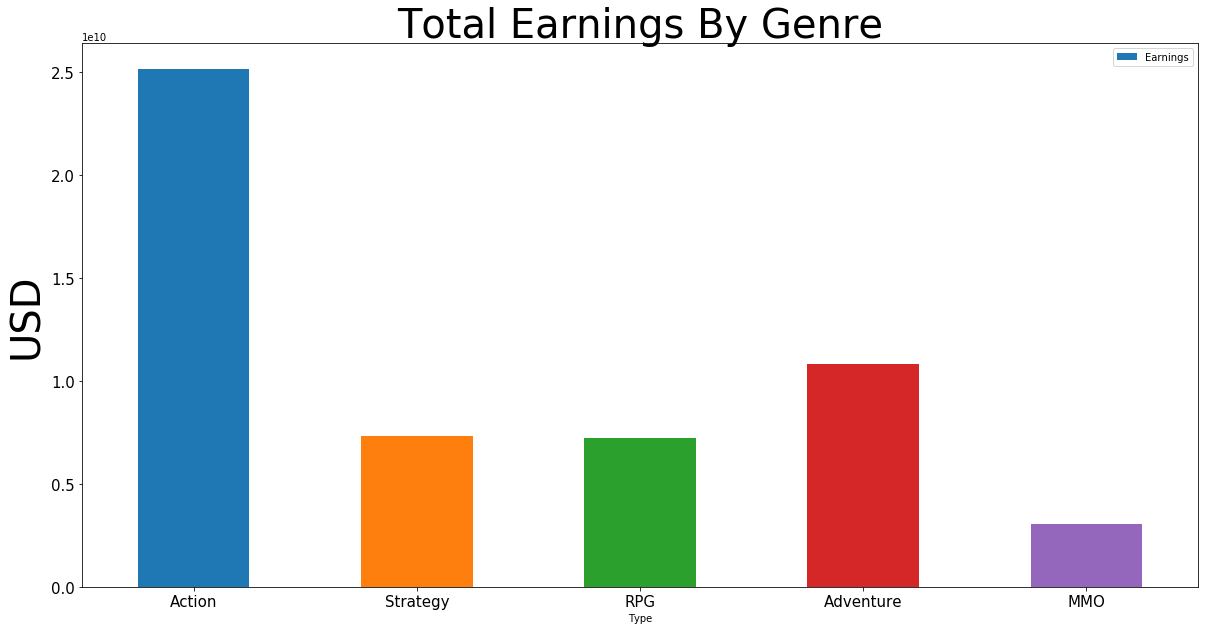

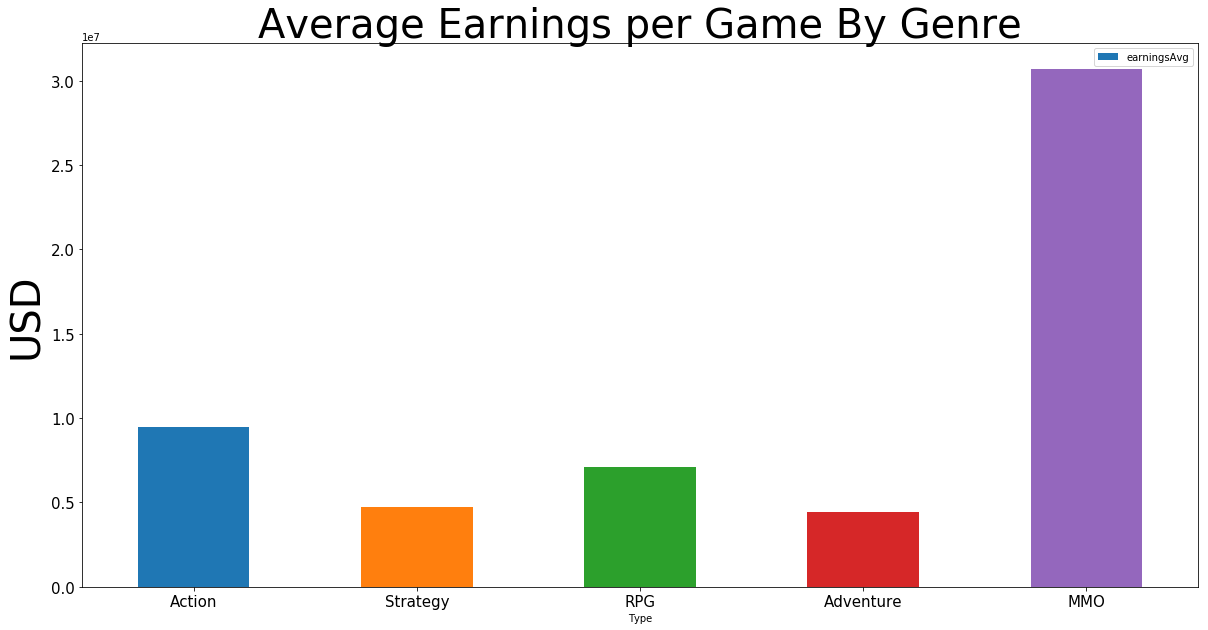

In [32]:
plotEarnings(theGenres, genreNames, title1 = "Total Earnings By Genre", title2 = "Average Earnings per Game By Genre")

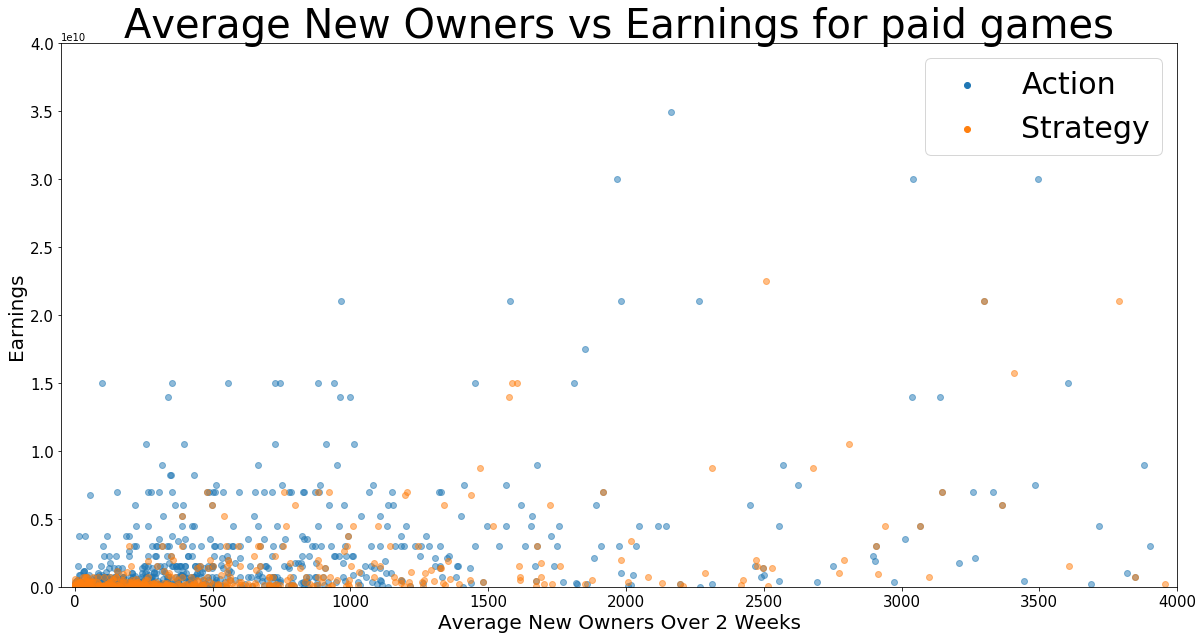

In [59]:
theGenres = [action, strategy]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Action', 'Strategy']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 40000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

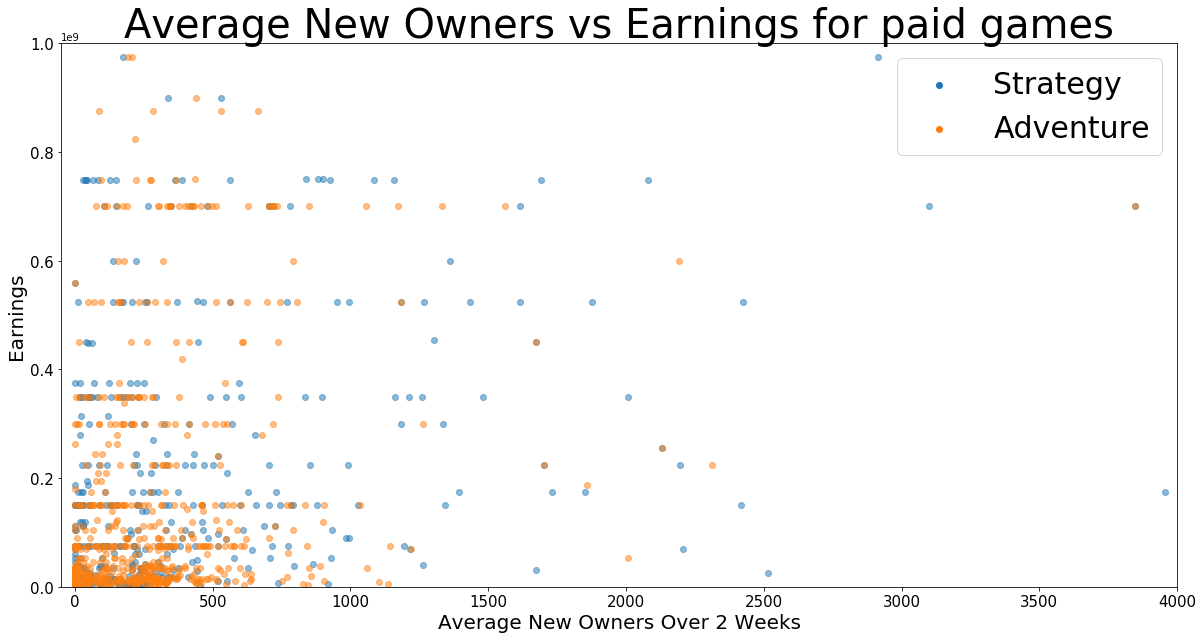

In [60]:
theGenres = [strategy, adventure]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Strategy', 'Adventure']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 1000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

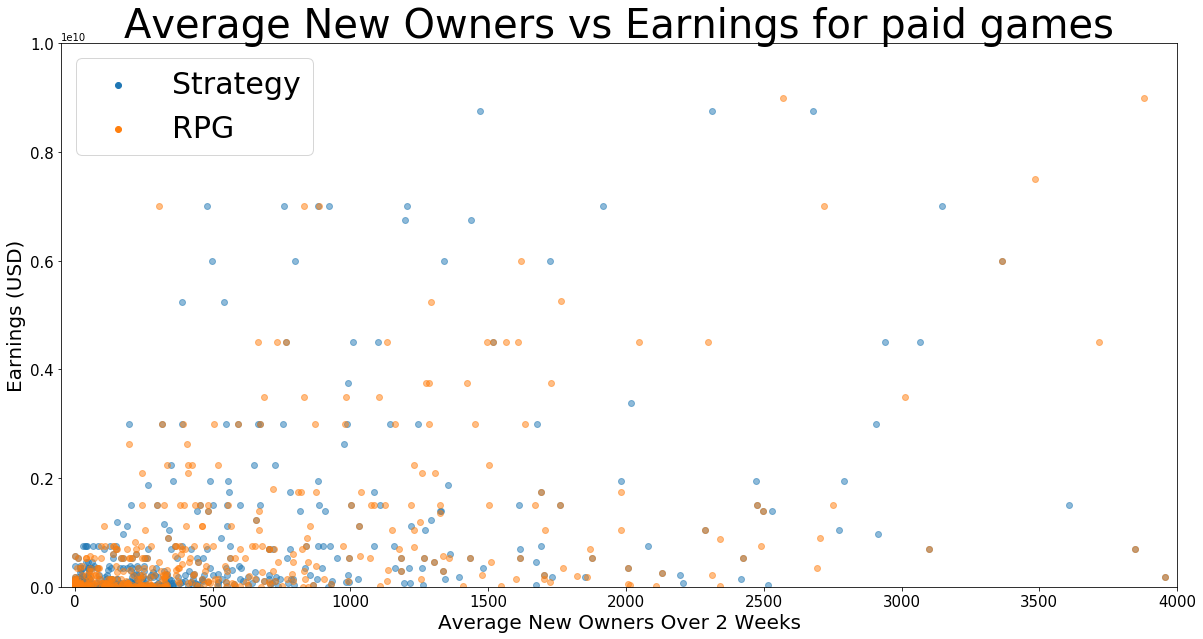

In [61]:
theGenres = [strategy, rpg]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Strategy', 'RPG']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 10000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)

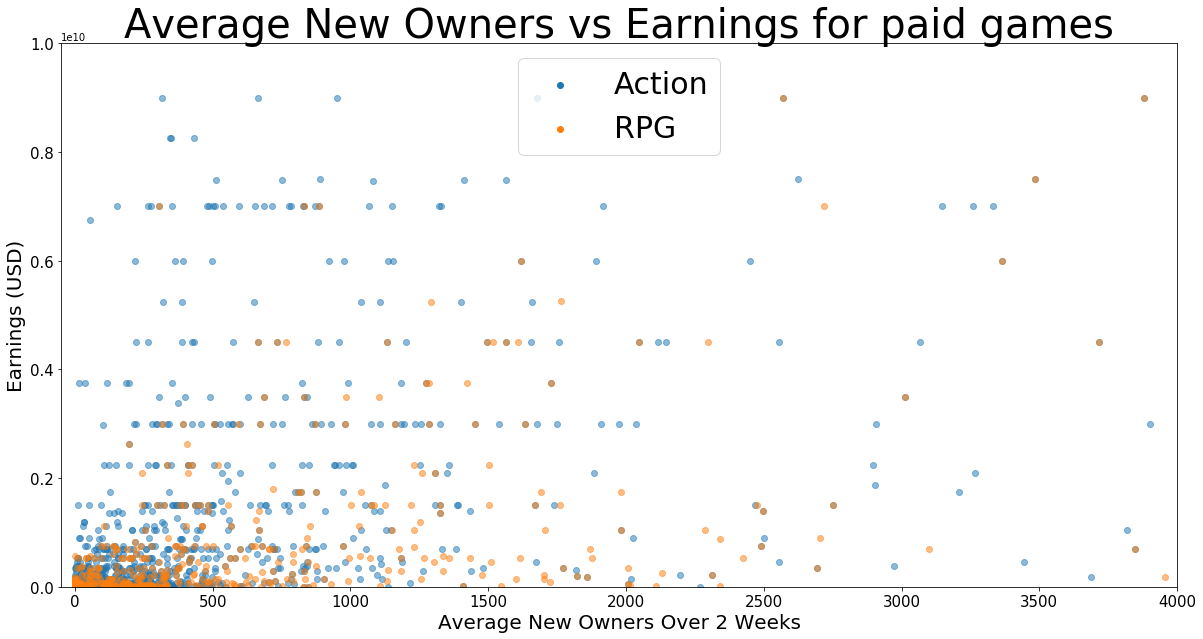

In [62]:
theGenres = [action, rpg]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Action', 'RPG']
#average new owners vs like/dislike for paid
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['earnings'], alpha=0.5)
plt.xlim(-50, 4000)
plt.ylim(-2, 10000000000)
leg = ax.legend(genreNames, fontsize = 30)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Earnings for paid games", fontsize=40)
ax.set_xlabel("Average New Owners Over 2 Weeks", fontsize = 20)
ax.set_ylabel("Earnings (USD)", fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 15)